In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from google.colab import files

In [2]:
# loading the csv data to a Pandas DataFrame
heart_data = pd.read_csv('heart_disease_data.csv')

In [3]:
heart_data.to_pickle('heart_disease_data.pkl')

In [4]:
files.download('heart_disease_data.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [5]:
# print first 5 rows of the dataset
heart_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [6]:
# print last 5 rows of the dataset
heart_data.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [7]:
# number of rows and columns in the dataset
heart_data.shape

(303, 14)

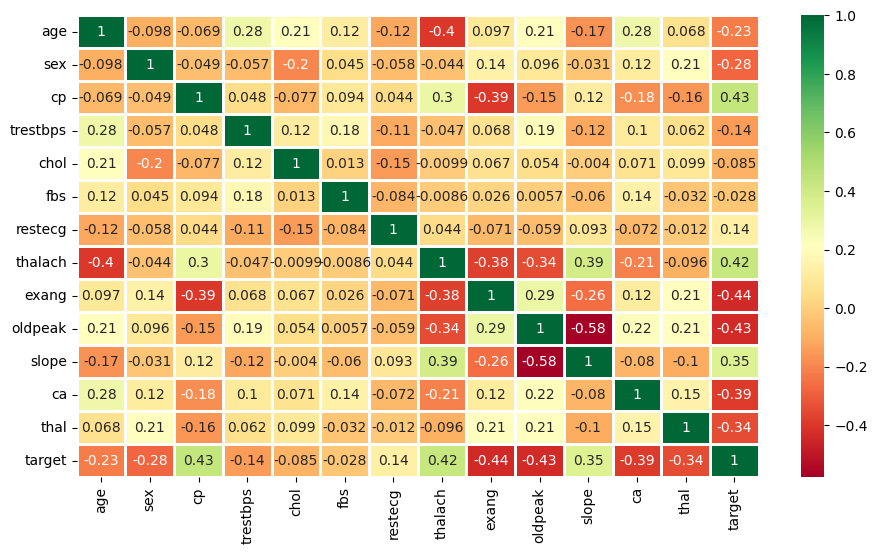

In [8]:
#checking correlation between features
plt.figure(figsize=(11, 6))
sns.heatmap(heart_data.corr(), annot=True, linewidths=2, cmap ='RdYlGn')
plt.show()

In [9]:
# getting some info about the data
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [10]:
# checking for missing values
heart_data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

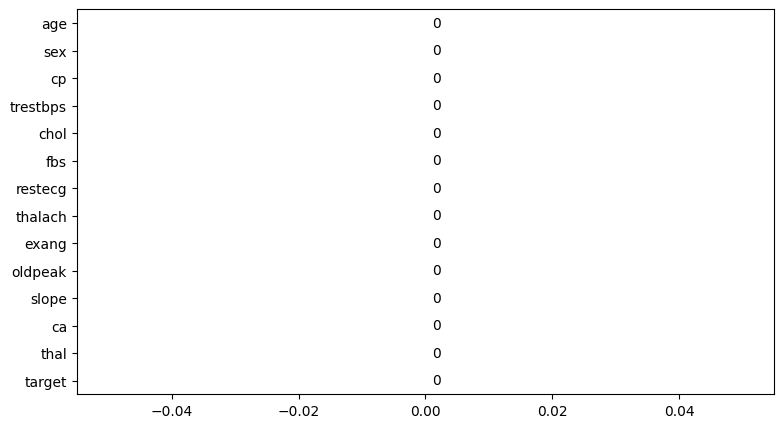

In [11]:
#Visualizing Null values
plt.figure(figsize=(9,5))
ax = sns.barplot(x=heart_data.isna().sum(),
           y=heart_data.columns, orient='h')
for p in ax.patches:
    ax.annotate(text=f"{p.get_width():.0f}", 
                xy=(p.get_width(), p.get_y()+p.get_height()/2),
                xytext=(5, 0), textcoords='offset points', 
                ha="left", va="center",
               )
plt.grid(False)
plt.show()

In [12]:
# statistical measures about the data
heart_data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [13]:
# checking the distribution of Target Variable
heart_data['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

In [14]:
X = heart_data.drop(columns='target', axis=1)
Y = heart_data['target']

In [15]:
print(X)

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  
0        0   0     1  
1        0   0     2  
2        2   0    

In [16]:
print(Y)

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64


In [17]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

In [18]:
print(X.shape, X_train.shape, X_test.shape)

(303, 13) (242, 13) (61, 13)


In [19]:
# create logistic regression model
lr_model = LogisticRegression()

In [20]:
# train the logistic regression model
lr_model.fit(X_train, Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [21]:
# accuracy on training data
lr_X_train_prediction = lr_model.predict(X_train)
lr_training_data_accuracy = accuracy_score(lr_X_train_prediction, Y_train)
print('Logistic Regression Accuracy on Training data : ', lr_training_data_accuracy)

Logistic Regression Accuracy on Training data :  0.8512396694214877


In [22]:
# accuracy on test data
lr_X_test_prediction = lr_model.predict(X_test)
lr_test_data_accuracy = accuracy_score(lr_X_test_prediction, Y_test)
print('Logistic Regression Accuracy on Test data : ', lr_test_data_accuracy)

Logistic Regression Accuracy on Test data :  0.819672131147541


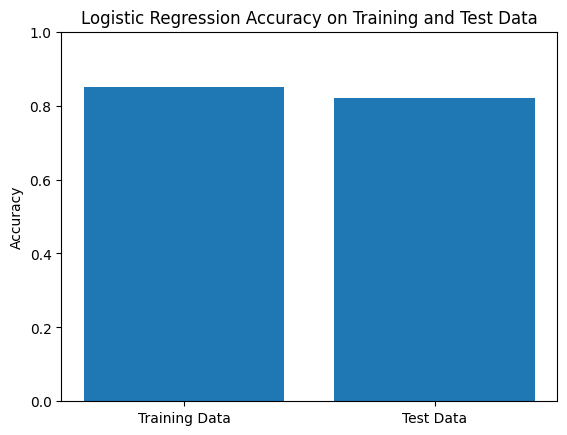

In [23]:
# calculate accuracy on training and test data
lr_X_train_prediction = lr_model.predict(X_train)
lr_training_data_accuracy = accuracy_score(lr_X_train_prediction, Y_train)

lr_X_test_prediction = lr_model.predict(X_test)
lr_test_data_accuracy = accuracy_score(lr_X_test_prediction, Y_test)

# create a bar chart for accuracy on training and test data
labels = ['Training Data', 'Test Data']
accuracy = [lr_training_data_accuracy, lr_test_data_accuracy]
plt.bar(labels, accuracy)
plt.ylim([0, 1])
plt.ylabel('Accuracy')
plt.title('Logistic Regression Accuracy on Training and Test Data')
plt.show()

In [24]:
with open('lr_model.pkl', 'wb') as file:
    pickle.dump(lr_model, file)
    files.download('lr_model.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [25]:
# create random forest model
rf_model = RandomForestClassifier(n_estimators=100)

In [26]:
# train the random forest model
rf_model.fit(X_train, Y_train)

RandomForestClassifier()

In [27]:
# accuracy on training data
rf_X_train_prediction = rf_model.predict(X_train)
rf_training_data_accuracy = accuracy_score(rf_X_train_prediction, Y_train)
print('Random Forest Accuracy on Training data : ', rf_training_data_accuracy)

Random Forest Accuracy on Training data :  1.0


In [28]:
# accuracy on test data
rf_X_test_prediction = rf_model.predict(X_test)
rf_test_data_accuracy = accuracy_score(rf_X_test_prediction, Y_test)
print('Random Forest Accuracy on Test data : ', rf_test_data_accuracy)

Random Forest Accuracy on Test data :  0.7540983606557377


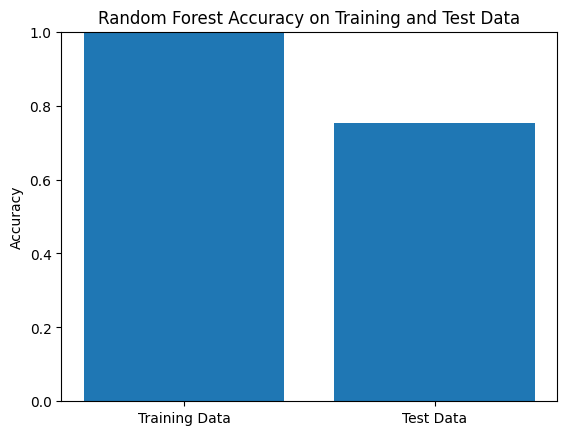

In [29]:
# calculate accuracy on training and test data
rf_X_train_prediction = rf_model.predict(X_train)
rf_training_data_accuracy = accuracy_score(rf_X_train_prediction, Y_train)

rf_X_test_prediction = rf_model.predict(X_test)
rf_test_data_accuracy = accuracy_score(rf_X_test_prediction, Y_test)

# create a bar chart for accuracy on training and test data
labels = ['Training Data', 'Test Data']
accuracy = [rf_training_data_accuracy, rf_test_data_accuracy]
plt.bar(labels, accuracy)
plt.ylim([0, 1])
plt.ylabel('Accuracy')
plt.title('Random Forest Accuracy on Training and Test Data')
plt.show()


In [30]:
with open('rf_model.pkl', 'wb') as file:
    pickle.dump(rf_model, file)
    files.download('rf_model.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [31]:
# create decision tree model
dt_model = DecisionTreeClassifier()

In [32]:
# train the decision tree model
dt_model.fit(X_train, Y_train)

DecisionTreeClassifier()

In [33]:
# accuracy on training data
dt_X_train_prediction = dt_model.predict(X_train)
dt_training_data_accuracy = accuracy_score(dt_X_train_prediction, Y_train)
print('Decision Tree Accuracy on Training data : ', dt_training_data_accuracy)

Decision Tree Accuracy on Training data :  1.0


In [34]:
# accuracy on test data
dt_X_test_prediction = dt_model.predict(X_test)
dt_test_data_accuracy = accuracy_score(dt_X_test_prediction, Y_test)
print('Decision Tree Accuracy on Test data : ', dt_test_data_accuracy)

Decision Tree Accuracy on Test data :  0.7868852459016393


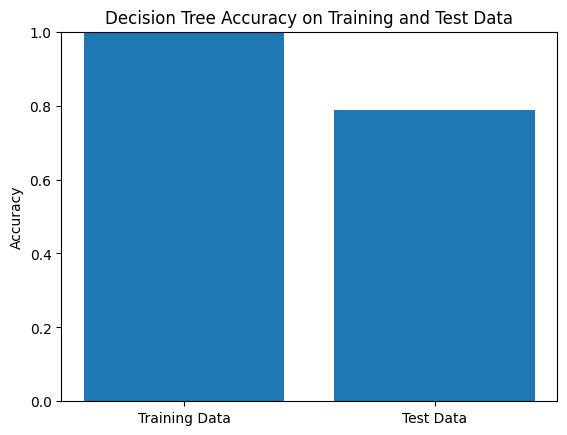

In [35]:
# calculate accuracy on training and test data
dt_X_train_prediction = dt_model.predict(X_train)
dt_training_data_accuracy = accuracy_score(dt_X_train_prediction, Y_train)

dt_X_test_prediction = dt_model.predict(X_test)
dt_test_data_accuracy = accuracy_score(dt_X_test_prediction, Y_test)

# create a bar chart for accuracy on training and test data
labels = ['Training Data', 'Test Data']
accuracy = [dt_training_data_accuracy, dt_test_data_accuracy]
plt.bar(labels, accuracy)
plt.ylim([0, 1])
plt.ylabel('Accuracy')
plt.title('Decision Tree Accuracy on Training and Test Data')
plt.show()


In [36]:
with open('dt_model.pkl', 'wb') as file:
    pickle.dump(dt_model, file)
    files.download('dt_model.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [37]:
#create naive bayes model
nb_model = GaussianNB()

In [38]:
#train the naive bayes model
nb_model.fit(X_train, Y_train)

GaussianNB()

In [39]:
#accuracy on training data
nb_X_train_prediction = nb_model.predict(X_train)
nb_training_data_accuracy = accuracy_score(nb_X_train_prediction, Y_train)
print('Naive Bayes Accuracy on Training data : ', nb_training_data_accuracy)

Naive Bayes Accuracy on Training data :  0.8471074380165289


In [40]:
#accuracy on test data
nb_X_test_prediction = nb_model.predict(X_test)
nb_test_data_accuracy = accuracy_score(nb_X_test_prediction, Y_test)
print('Naive Bayes Accuracy on Test data : ', nb_test_data_accuracy)

Naive Bayes Accuracy on Test data :  0.819672131147541


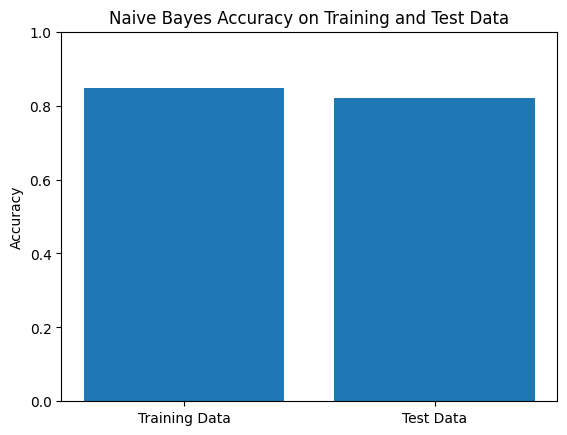

In [41]:
# calculate accuracy on training and test data
nb_X_train_prediction = nb_model.predict(X_train)
nb_training_data_accuracy = accuracy_score(nb_X_train_prediction, Y_train)

nb_X_test_prediction = nb_model.predict(X_test)
nb_test_data_accuracy = accuracy_score(nb_X_test_prediction, Y_test)

# create a bar chart for accuracy on training and test data
labels = ['Training Data', 'Test Data']
accuracy = [nb_training_data_accuracy, nb_test_data_accuracy]
plt.bar(labels, accuracy)
plt.ylim([0, 1])
plt.ylabel('Accuracy')
plt.title('Naive Bayes Accuracy on Training and Test Data')
plt.show()


In [42]:
with open('nb_model.pkl', 'wb') as file:
    pickle.dump(nb_model, file)
    files.download('nb_model.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [43]:
#create MLP model
mlp_model = MLPClassifier(hidden_layer_sizes=(50,50), max_iter=1000)

In [44]:
#train the MLP model
mlp_model.fit(X_train, Y_train)

MLPClassifier(hidden_layer_sizes=(50, 50), max_iter=1000)

In [45]:
#accuracy on training data
mlp_X_train_prediction = mlp_model.predict(X_train)
mlp_training_data_accuracy = accuracy_score(mlp_X_train_prediction, Y_train)
print('MLP Accuracy on Training data : ', mlp_training_data_accuracy)

MLP Accuracy on Training data :  0.8140495867768595


In [46]:
#accuracy on test data
mlp_X_test_prediction = mlp_model.predict(X_test)
mlp_test_data_accuracy = accuracy_score(mlp_X_test_prediction, Y_test)
print('MLP Accuracy on Test data : ', mlp_test_data_accuracy)

MLP Accuracy on Test data :  0.7049180327868853


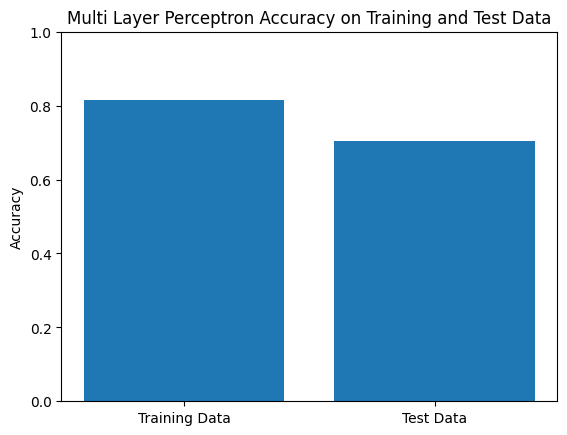

In [47]:
# calculate accuracy on training and test data
mlp_X_train_prediction = mlp_model.predict(X_train)
mlp_training_data_accuracy = accuracy_score(mlp_X_train_prediction, Y_train)

mlp_X_test_prediction = mlp_model.predict(X_test)
mlp_test_data_accuracy = accuracy_score(mlp_X_test_prediction, Y_test)

# create a bar chart for accuracy on training and test data
labels = ['Training Data', 'Test Data']
accuracy = [mlp_training_data_accuracy, mlp_test_data_accuracy]
plt.bar(labels, accuracy)
plt.ylim([0, 1])
plt.ylabel('Accuracy')
plt.title('Multi Layer Perceptron Accuracy on Training and Test Data')
plt.show()


In [48]:
with open('mlp_model.pkl', 'wb') as file:
    pickle.dump(mlp_model, file)
    files.download('mlp_model.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [49]:
#create SVC model
svc_model = SVC(kernel='linear')

In [50]:
#train the SVC model
svc_model.fit(X_train, Y_train)

SVC(kernel='linear')

In [51]:
#accuracy on training data
svc_X_train_prediction = svc_model.predict(X_train)
svc_training_data_accuracy = accuracy_score(svc_X_train_prediction, Y_train)
print('SVC Accuracy on Training data : ', svc_training_data_accuracy)

SVC Accuracy on Training data :  0.8553719008264463


In [52]:
#accuracy on test data
svc_X_test_prediction = svc_model.predict(X_test)
svc_test_data_accuracy = accuracy_score(svc_X_test_prediction, Y_test)
print('SVC Accuracy on Test data : ', svc_test_data_accuracy)

SVC Accuracy on Test data :  0.819672131147541


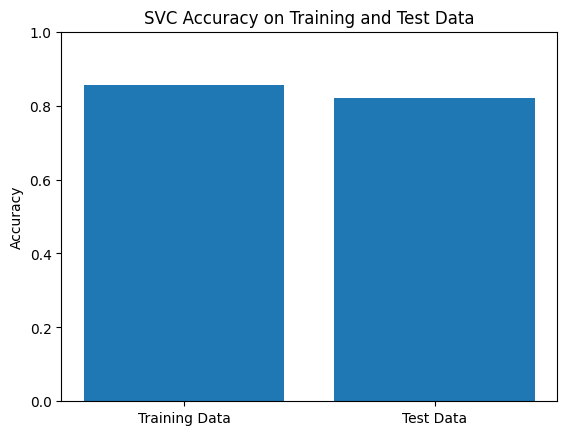

In [53]:
# calculate accuracy on training and test data
svc_X_train_prediction = svc_model.predict(X_train)
svc_training_data_accuracy = accuracy_score(svc_X_train_prediction, Y_train)

svc_X_test_prediction = svc_model.predict(X_test)
svc_test_data_accuracy = accuracy_score(svc_X_test_prediction, Y_test)

# create a bar chart for accuracy on training and test data
labels = ['Training Data', 'Test Data']
accuracy = [svc_training_data_accuracy, svc_test_data_accuracy]
plt.bar(labels, accuracy)
plt.ylim([0, 1])
plt.ylabel('Accuracy')
plt.title('SVC Accuracy on Training and Test Data')
plt.show()


In [54]:
with open('svc_model.pkl', 'wb') as file:
    pickle.dump(svc_model, file)
    files.download('svc_model.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
input_data = (62,0,0,140,268,0,0,160,0,3.6,0,2,2)

# change the input data to a numpy array
input_data_as_numpy_array= np.asarray(input_data)

# reshape the numpy array as we are predicting for only one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

# make predictions using all the models
lr_prediction = lr_model.predict(input_data_reshaped)[0]
rf_prediction = rf_model.predict(input_data_reshaped)[0]
svc_prediction = svc_model.predict(input_data_reshaped)[0]
dt_prediction = dt_model.predict(input_data_reshaped)[0]
mlp_prediction = mlp_model.predict(input_data_reshaped)[0]
nb_prediction = nb_model.predict(input_data_reshaped)[0]

# combine the predictions using a voting system
votes = [lr_prediction, rf_prediction, svc_prediction, dt_prediction, mlp_prediction, nb_prediction]
total_votes = len(votes)
positive_votes = sum(votes)
negative_votes = total_votes - positive_votes

# make the final prediction based on the majority vote
if positive_votes > negative_votes:
    print('The Person has Heart Disease')
else:
    print('The Person does not have a Heart Disease')


The Person does not have a Heart Disease


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature nam